## 题目：一起来画龙

## **题目要求：**

本次练习我们使用上节课的爱奇艺视频数据，共有6万多条电影数据，每条数据包含12列信息，文件的路径为`./data/aiqiyi.xlsx`，
以下获取的前五条数据：

![](../assets/11.png)

现在我们需要画出电影产量与年份的趋势图。


In [ ]:
1. 根据年份将电影数据分组；
2. 分别计算每年的电影数量；
3. 根据电影年份和数量画出折线图。
# 根据上映时间分组
# 根据评分获取出年份和评分的数量   # Series
# 获取出年份列表
# 获取出数量列表
# 绘制折线
首先根据‘上映时间’进行分组，然后使用分组后的数据统计出每一年的‘评分数量’，就是对应的年那电影产量
以时间为横坐标，电影产量为纵坐标

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel('../data/aiqiyi.xlsx')
df

,演员,类型,整理后剧名,上映时间,语言,评分,地区,导演,差评数,评分人数,播放量,好评数
0,ELLA/吴尊/汪东城/唐禹哲/唐治平/阮经天/张皓明/龚继安/郭静纯,言情剧/偶像剧/青春剧/粤语电视剧/超清1080P,花样少年少女,2006,国语,8.8,台湾,林清芳/王明台,5498,45800,26090000,40302
1,UEE/崔宇植/任瑟雍,言情剧/剧情/都市/粤语电视剧/超清1080P,浩9的爱情,2015,韩语,8.0,韩国,表民洙,2065,10265,6140000,8200
2,Weir Sukollwat/Usamanee Vaithayanon/查亚鹏·普帕特,偶像剧/言情剧/剧情/年代剧/粤语电视剧/超清1080P,命定之爱国语,2007,国语,8.5,泰国,未知,5458,35846,38190000,30388
3,丁勇岱,罪案剧/剧情/粤语电视剧/超清1080P,末路1997,2000,国语,7.5,内地,陈国军,963,3832,10360000,2869
4,丁勇岱/刘威葳/郭涛/周晓鸥,剧情/都市/粤语电视剧,暗伤,2006,国语,6.0,内地,高群书,279,691,2150000,412
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,黄觉/颜丹晨/张宝雯,历史剧/剧情/年代剧/谍战剧/粤语电视剧/超清1080P,黑色名单,2011,国语,5.8,内地,余丁,1360,3263,13590000,1903
1475,黑子/颜丹晨/储智博/翟万臣/许还山/王静/何珈好/岳红,历史剧/古装剧/剧情/粤语电视剧,商贾将军,2007,国语,6.3,内地,李三林,1040,2791,5220000,1751
1476,龚锦堂/黄锦裳/苏志丹/丁玲/张纹博/郭昶,剧情/家庭剧/喜剧/粤语电视剧/超清1080P,外来媳妇本地郎,2000,国语,8.9,内地,陆晓光/王岗/王胜起/刘卫平/杨甲年,1265,11226,16690000,9961
1477,龚锦堂/黄锦裳/苏志丹/丁玲/张纹博/郭昶,剧情/家庭剧/喜剧/粤语电视剧/超清1080P,外来媳妇本地郎2,2000,国语,7.8,内地,陆晓光/王岗/王胜起/刘卫平/杨甲年,1252,5717,8380000,4465


In [7]:
# 根据上映时间分组
groups = df.groupby('上映时间')
# groups.size()
groups.groups

{1985: Int64Index([1195, 1231], dtype='int64'),
 1986: Int64Index([156, 603], dtype='int64'),
 1988: Int64Index([788, 1232], dtype='int64'),
 1989: Int64Index([700], dtype='int64'),
 1990: Int64Index([229, 441, 1157, 1251], dtype='int64'),
 1991: Int64Index([82, 742, 1144], dtype='int64'),
 1992: Int64Index([195, 358, 1089], dtype='int64'),
 1993: Int64Index([664, 1206, 1233, 1345, 1400], dtype='int64'),
 1994: Int64Index([637, 901, 1463], dtype='int64'),
 1995: Int64Index([7, 162, 305, 353, 381, 725, 898, 961, 1250, 1273, 1341], dtype='int64'),
 1996: Int64Index([  77,  138,  142,  145,  158,  232,  409,  416,  626,  644,  724,
              793,  886,  971, 1047, 1236, 1282, 1331],
            dtype='int64'),
 1997: Int64Index([76, 488, 550, 563, 619, 630, 800, 1013, 1069, 1077, 1137, 1303], dtype='int64'),
 1998: Int64Index([  18,  139,  165,  172,  238,  239,  245,  247,  309,  390,  484,
              506,  521,  561,  688,  704,  754,  781,  799,  825,  832, 1222,
             14

In [9]:
# 根据评分获取出年份和数量的Series
num_series = groups['评分'].count()
num_series

上映时间
1985      2
1986      2
1988      2
1989      1
1990      4
1991      3
1992      3
1993      5
1994      3
1995     11
1996     18
1997     12
1998     24
1999     25
2000     33
2001     39
2002     65
2003     88
2004    100
2005    113
2006    109
2007     94
2008     98
2009     60
2010     53
2011     53
2012     56
2013     73
2014    119
2015    169
2016     42
Name: 评分, dtype: int64

In [4]:
# 获取出年份列表
year_list= num_series.index.tolist()
year_list

[1985,
 1986,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [5]:
# 获取出数量列表
num_list= num_series.values.tolist()
num_list

[2,
 2,
 2,
 1,
 4,
 3,
 3,
 5,
 3,
 11,
 18,
 12,
 24,
 25,
 33,
 39,
 65,
 88,
 100,
 113,
 109,
 94,
 98,
 60,
 53,
 53,
 56,
 73,
 119,
 169,
 42]

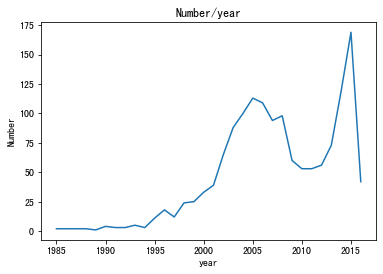

In [6]:
# 绘制折线
plt.plot(year_list,num_list) 
plt.xlabel('year')
plt.ylabel("Number")
plt.title('Number/year')
plt.show()

In [11]:
df.head()

,演员,类型,整理后剧名,上映时间,语言,评分,地区,导演,差评数,评分人数,播放量,好评数
0,ELLA/吴尊/汪东城/唐禹哲/唐治平/阮经天/张皓明/龚继安/郭静纯,言情剧/偶像剧/青春剧/粤语电视剧/超清1080P,花样少年少女,2006,国语,8.8,台湾,林清芳/王明台,5498,45800,26090000,40302
1,UEE/崔宇植/任瑟雍,言情剧/剧情/都市/粤语电视剧/超清1080P,浩9的爱情,2015,韩语,8.0,韩国,表民洙,2065,10265,6140000,8200
2,Weir Sukollwat/Usamanee Vaithayanon/查亚鹏·普帕特,偶像剧/言情剧/剧情/年代剧/粤语电视剧/超清1080P,命定之爱国语,2007,国语,8.5,泰国,未知,5458,35846,38190000,30388
3,丁勇岱,罪案剧/剧情/粤语电视剧/超清1080P,末路1997,2000,国语,7.5,内地,陈国军,963,3832,10360000,2869
4,丁勇岱/刘威葳/郭涛/周晓鸥,剧情/都市/粤语电视剧,暗伤,2006,国语,6.0,内地,高群书,279,691,2150000,412


In [12]:
print(groups['评分'])

In [10]:
for group_name,group_data in groups:
    print(group_name,group_data)

1985                       演员                        类型    整理后剧名  上映时间  语言   评分  \
1195  邵华/郑邦玉/高维启/李维康/李婉芬  家庭剧/剧情/年代剧/粤语电视剧/超清1080P     4世同堂  1985  国语  7.9   
1231                 郭法曾     历史剧/年代剧/粤语电视剧/超清1080P  少奇同志在东北  1985  国语  5.7   

      地区   导演  差评数  评分人数      播放量   好评数  
1195  内地  林汝为  282  1323  1330000  1041  
1231  内地  王保华  106   247   290000   141  
1986          演员                        类型  整理后剧名  上映时间  语言   评分  地区   导演  差评数  \
156      刘佳   家庭剧/剧情/都市/粤语电视剧/超清1080P    钟鼓楼  1986  国语  7.2  内地  鲁晓威   65   
603  朱琳/石兆琪  言情剧/剧情/年代剧/粤语电视剧/超清1080P  凯旋在子夜  1986  国语  7.1  内地  尤小刚  346   

     评分人数      播放量  好评数  
156   232   249000  167  
603  1179  1330000  833  
1988        演员                        类型    整理后剧名  上映时间  语言   评分  地区   导演  差评数  \
788   毕海峰      剧情/年代剧/粤语电视剧/超清1080P     小镇总理  1988  国语  4.9  内地   白唐   90   
1232  郭法曾  历史剧/剧情/年代剧/粤语电视剧/超清1080P  少奇同志在武汉  1988  国语  6.1  内地  王保华   62   

      评分人数     播放量  好评数  
788    178  141000   88  
1232   159  124000   97  
1989

In [13]:
for group_name,group_data in groups:
    print(group_name,group_data['评分'])

1985 1195    7.9
1231    5.7
Name: 评分, dtype: float64
1986 156    7.2
603    7.1
Name: 评分, dtype: float64
1988 788     4.9
1232    6.1
Name: 评分, dtype: float64
1989 700    6.4
Name: 评分, dtype: float64
1990 229     6.1
441     8.0
1157    7.5
1251    6.4
Name: 评分, dtype: float64
1991 82      6.3
742     8.2
1144    7.7
Name: 评分, dtype: float64
1992 195     5.3
358     8.3
1089    4.2
Name: 评分, dtype: float64
1993 664     7.5
1206    6.7
1233    8.7
1345    6.8
1400    6.9
Name: 评分, dtype: float64
1994 637     5.9
901     9.1
1463    6.5
Name: 评分, dtype: float64
1995 7       6.2
162     8.7
305     6.0
353     6.5
381     3.9
725     6.1
898     9.1
961     6.5
1250    5.9
1273    8.6
1341    5.0
Name: 评分, dtype: float64
1996 77      7.3
138     7.8
142     6.0
145     7.3
158     7.5
232     5.2
409     7.0
416     5.6
626     8.8
644     6.9
724     5.1
793     6.4
886     5.2
971     5.9
1047    6.0
1236    5.9
1282    7.3
1331    6.1
Name: 评分, dtype: float64
1997 76      4.6
488     